In [1]:
####################################################
# Importamos las librerias
####################################################
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.8.0


In [2]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
####################################################
# Cuento cuantos hay de cada calidad
####################################################
wine_data.groupby('quality').count().reset_index()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,10,10,10,10,10,10,10,10,10,10,10
1,4,53,53,53,53,53,53,53,53,53,53,53
2,5,681,681,681,681,681,681,681,681,681,681,681
3,6,638,638,638,638,638,638,638,638,638,638,638
4,7,199,199,199,199,199,199,199,199,199,199,199
5,8,18,18,18,18,18,18,18,18,18,18,18


In [4]:
####################################################
# Reemplazo las calidades de 3 a 8 por del 0 al 5
####################################################
wine_data['quality'].replace(to_replace={3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}, inplace=True)


In [5]:
####################################################
# Defino las columnas de estudio y la de calidad
####################################################
X = wine_data[['fixed acidity',
               'volatile acidity',
               'citric acid',
               'residual sugar',
               'chlorides',
               'free sulfur dioxide',
               'total sulfur dioxide',
               'density',
               'pH',
               'sulphates',
               'alcohol']]

y = wine_data['quality']

<AxesSubplot:>

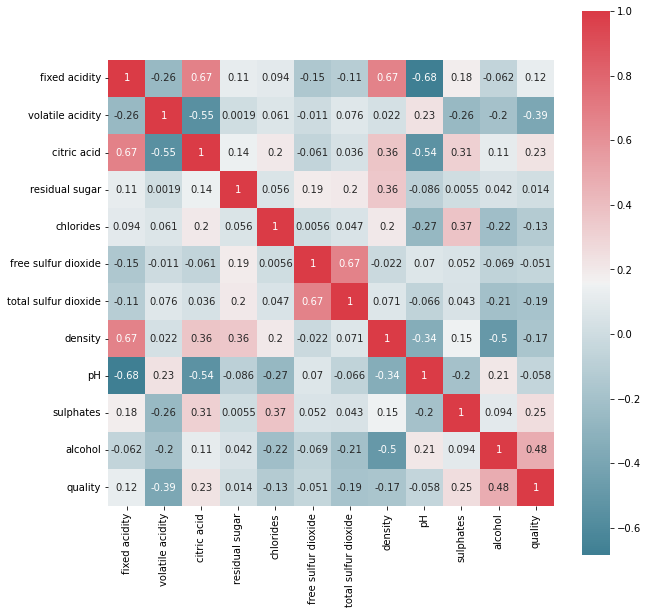

In [6]:
####################################################
# Busco correlaciones
####################################################
corr = wine_data.corr(method = "pearson")
# corr = wine_data.corr(method = "spearman")
# corr = wine_data.corr(method = "kendall")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

In [7]:
####################################################
# Miro las columnas que tengan una correlacion mayor a 0.7 para quitarlas
####################################################
for a in range(len(wine_data.corr().columns)):
    for b in range(a):
        if abs(wine_data.corr().iloc[a,b]) >0.7:
            name = wine_data.corr().columns[a]
            print(name)
# new_df=df.drop('total sulfur dioxide',axis=1)

In [8]:
####################################################
# Divido los sets en train y test.
####################################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.337373,0.530000,0.272181,2.553167,0.087024,16.032838,47.114152,0.996757,3.309828,0.659077,10.413995
std,1.734938,0.182544,0.195608,1.452549,0.047801,10.520943,33.584207,0.001882,0.153968,0.174846,1.061308
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995620,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996760,3.310000,0.620000,10.200000
75%,9.300000,0.637500,0.420000,2.600000,0.090000,21.000000,63.000000,0.997855,3.400000,0.730000,11.083333
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [9]:
from sklearn.preprocessing import StandardScaler
####################################################
# Estandarizo los datos
####################################################
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
####################################################
# Utilizo los datos del train para estandarizar el test tambien
####################################################
X_test = scaler.transform(X_test)


In [23]:
####################################################
# Creo una red neuronal secuencial, es decir, capa por capa. Es más simple que la funcional
# https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/#:~:text=The%20functional%20API%20offers%20more,inputs(i.e%20input%20layers))
# activation relu hace el max(x,0), es decir devuelve positivos
# droput me permite evitar el overfitting. 
# si la ultima capa tuviera una sola neurina, me daria una clasificacion (0 o 1 o 2..)
# al poner 6 y softmax me devuelev la probabilidad
####################################################

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=35, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=72, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=42, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='softmax')
])
blalba = tf.keras.models.Sequential()
#########################################
# el optimizadfor es un algoritmo que cambia losa tributos de la redes neuronales, como los wights o el learningrate para reducir los losses
# sgd es un gradient descent.
# loss The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
# sparse_categorical_crossentropy Computes the crossentropy loss between the labels and predictions.
# Cross-entropy loss increases as the predicted probability diverges from the actual label.
####################################################
# Uso crossentropy porque es buena para modelos que tiene probabilidades como resultados
# −(ylog(p)+(1−y)log(1−p))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 35)                420       
                                                                 
 dense_60 (Dense)            (None, 52)                1872      
                                                                 
 dense_61 (Dense)            (None, 72)                3816      
                                                                 
 dense_62 (Dense)            (None, 52)                3796      
                                                                 
 dropout_12 (Dropout)        (None, 52)                0         
                                                                 
 dense_63 (Dense)            (None, 52)                2756      
                                                                 
 dense_64 (Dense)            (None, 42)               

In [41]:
cl = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=60)
# El 40 viene de que el batch_size (muestras que coge) por defecto es 32, así que 32*40 = 1280 que es mi test

Epoch 1/60
40/40 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8679 - val_loss: 1.2121 - val_accuracy: 0.6500
Epoch 2/60
40/40 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8655 - val_loss: 1.2449 - val_accuracy: 0.6500
Epoch 3/60
40/40 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8475 - val_loss: 1.2371 - val_accuracy: 0.6313
Epoch 4/60
40/40 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8655 - val_loss: 1.2057 - val_accuracy: 0.6500
Epoch 5/60
40/40 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8749 - val_loss: 1.2562 - val_accuracy: 0.6406
Epoch 6/60
40/40 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8280 - val_loss: 1.1522 - val_accuracy: 0.6469
Epoch 7/60
40/40 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8804 - val_loss: 1.2836 - val_accuracy: 0.6156
Epoch 8/60
40/40 [==

In [38]:
# Loss is the penalty for a bad prediction. 
# That is, loss is a number indicating how bad the model's prediction was on a single example.
#  If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. 

(1279,)

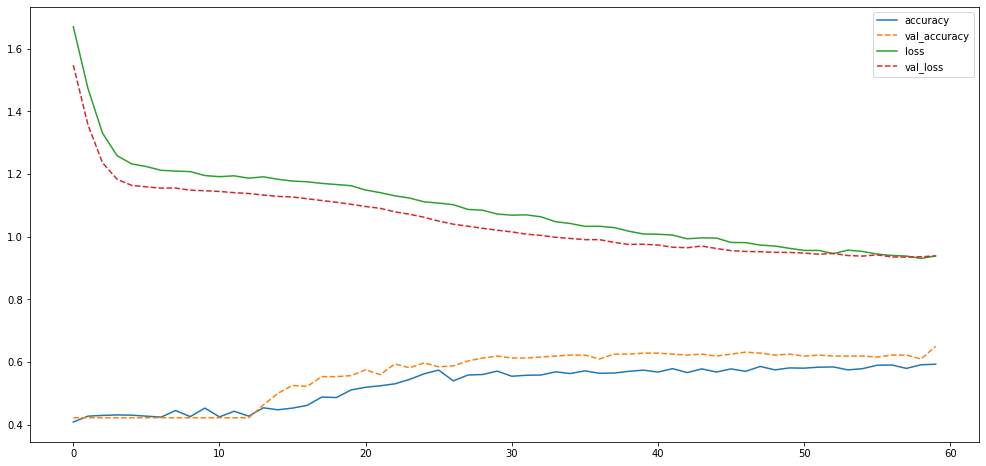

In [12]:
# loss and val_loss differ because the former is applied to the train set, and the latter the test set.
# 's best to rely on the val_loss to prevent overfitting.
#  Overfitting is when the model fits the training data too closely,
#  and the loss keeps decreasing while the val_loss is stale, or increases
# Accuracy is a metric only for classification. It makes no sense on a task with a continuous target.
#  It gives the percentage of instances that are correctly classified.

# Once again, acc is on the training data, and val_acc is on the validation data.
#  It's best to rely on val_acc for a fair representation of model performance because a good neural network 
#  will end up fitting the training data at 100%, but would perform poorly on unseen data.


fig, ax = plt.subplots(figsize=(17,8))

plt.plot(cl.history['accuracy'], label='accuracy')
plt.plot(cl.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(cl.history['loss'], label='loss')
plt.plot(cl.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()

0.9385022521018982

In [13]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print(f'Test Loss is {ModelLoss}')
print(f'Test Accuracy is {ModelAccuracy}')

10/10 [==============================] - 0s 836us/step - loss: 0.9386 - accuracy: 0.6500
Test Loss is 0.9386059045791626
Test Accuracy is 0.6499999761581421


In [14]:
y_pred = model.predict(X_test)
y_test_list=list(y_test)
total=len(y_test_list)
correct=0

for i in range(total):
  if(np.argmax(y_pred[i])==y_test_list[i]):
    correct+=1

print(f'{correct}/{total}')
print(correct/total)

208/320
0.65


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

predict=model.predict(X_test)

y_pred=[]
for i in range(len(predict)):
    y_pred.append(np.argmax(predict[i]))

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.72      0.73      0.72       135
           3       0.62      0.75      0.68       142
           4       0.27      0.11      0.16        27
           5       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.27      0.27      0.26       320
weighted avg       0.60      0.65      0.62       320



C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(0.5, 33.0, 'Predicted label')

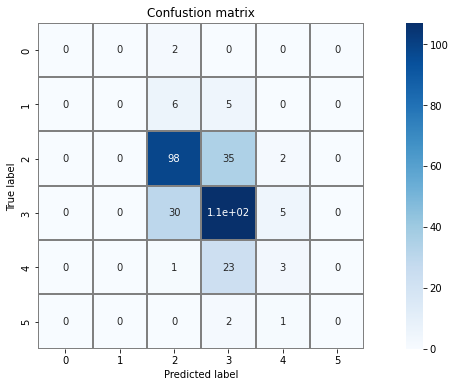

In [16]:
p_test = model.predict(X_test).argmax(axis=1)
cm = tf.math.confusion_matrix(y_test, p_test)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [17]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(f"One-vs-rest: {roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')}")
print(f"One-vs-one: {roc_auc_score(y_test, model.predict(X_test), multi_class='ovo')}")

One-vs-rest: 0.683050953601632
One-vs-one: 0.6554264870931538
